In [1]:
import os
import struct
class MNIST():
    def __init__(self, directory):
        self._directory = directory
        
        self._training_data = self._load_binaries("train-images.idx3-ubyte")
        self._training_labels = self._load_binaries("train-labels.idx1-ubyte")
        self._test_data = self._load_binaries("t10k-images.idx3-ubyte")
        self._test_labels = self._load_binaries("t10k-labels.idx1-ubyte")
        
        np.random.seed(0)
        samples_n = self._training_labels.shape[0]
        random_indices = np.random.choice(samples_n, samples_n // 10, replace = False)
        np.random.seed()
        
        self._validation_data = self._training_data[random_indices]
        self._validation_labels = self._training_labels[random_indices]
        self._training_data = np.delete(self._training_data, random_indices, axis = 0)
        self._training_labels = np.delete(self._training_labels, random_indices)
    
    def _load_binaries(self, file_name):
        path = os.path.join(self._directory, file_name)
        
        with open(path, 'rb') as fd:
            check, items_n = struct.unpack(">ii", fd.read(8))

            if "images" in file_name and check == 2051:
                height, width = struct.unpack(">II", fd.read(8))
                images = np.fromfile(fd, dtype = 'uint8')
                return np.reshape(images, (items_n, height, width))
            elif "labels" in file_name and check == 2049:
                return np.fromfile(fd, dtype = 'uint8')
            else:
                raise ValueError("Not a MNIST file: " + path)
    
    
    def get_training_batch(self, batch_size):
        return self._get_batch(self._training_data, self._training_labels, batch_size)
    
    def get_validation_batch(self, batch_size):
        return self._get_batch(self._validation_data, self._validation_labels, batch_size)
    
    def get_test_batch(self, batch_size):
        return self._get_batch(self._test_data, self._test_labels, batch_size)
    
    def _get_batch(self, data, labels, batch_size):
        samples_n = labels.shape[0]
        if batch_size <= 0:
            batch_size = samples_n
        
        random_indices = np.random.choice(samples_n, samples_n, replace = False)
        data = data[random_indices]
        labels = labels[random_indices]
        for i in range(samples_n // batch_size):
            on = i * batch_size
            off = on + batch_size
            yield data[on:off], labels[on:off]
    
    
    def get_sizes(self):
        training_samples_n = self._training_labels.shape[0]
        validation_samples_n = self._validation_labels.shape[0]
        test_samples_n = self._test_labels.shape[0]
        return training_samples_n, validation_samples_n, test_samples_n

In [10]:
os.getcwd()

'/mnt/c/Users/eler/Documents/Cognitive_Science/handwriting_detection/generate_dataset/Task_2'

<class 'numpy.ndarray'>
0


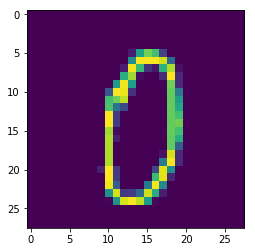

In [13]:
#from mnistHelp import MNIST
import numpy as np
myMnist = MNIST(os.getcwd())
pic = []
label = 0
for x in myMnist.get_training_batch(10):
    pic = x[0][0]
    label = x[1][0]
    print(type(pic))
    print(label)
    break

import matplotlib.pyplot as plt
plt.imshow(pic)
plt.show()

In [3]:
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

class updateblePlot:
    def __init__(self):
        self.losses = []
        self.losses1 = []
    def updateAndPlotLossMatrix(self, axis, updateValue,posInSubplot = 0):
        losses = self.losses
        if str(type(axis))=="<class 'numpy.ndarray'>":
            if posInSubplot == 0:
                self.losses.append(updateValue)
            elif posInSubplot == 1:
                self.losses1.append(updateValue)
                
            #Plot error curve in time of training
            plt.sca(axis[posInSubplot])
            axis[posInSubplot].cla() # clear
            axis[posInSubplot].plot(np.arange(len(losses)), losses) #TODO
            plt.title('Loss')
            plt.ylabel('Cost')
            plt.xlabel('Training Step')

            #update view
            fig.canvas.draw()  
            #sleep(0.5)
        elif str(type(axis))=="<class 'matplotlib.axes._subplots.AxesSubplot'>":
            losses = self.losses
            losses.append(updateValue)
            #Error curve in time of training
            plt.sca(axis)
            axis.cla() # clear
            axis.plot(np.arange(len(losses)), losses) #TODO
            plt.title('Loss')
            plt.ylabel('Cost')
            plt.xlabel('Training Step')

            #update view
            fig.canvas.draw()  
            #sleep(0.5)
        else:
            print(str(type(axis)))

<IPython.core.display.Javascript object>


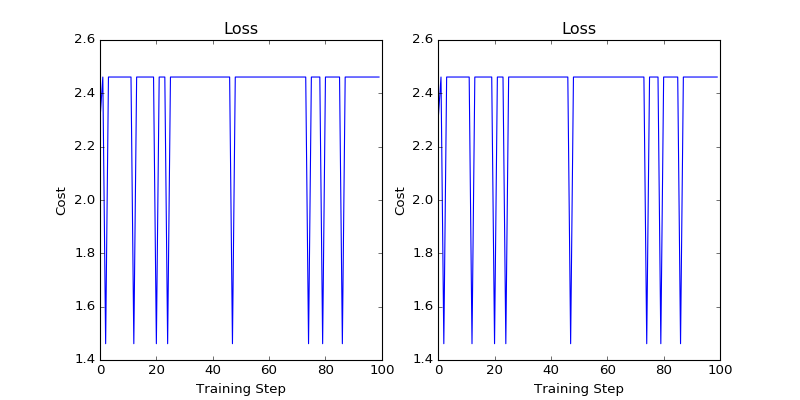

[ 2.30258512]
[ 2.46115017]
[ 1.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 1.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 1.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 1.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 1.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46115017]
[ 2.46

In [6]:
import tensorflow as tf

"""a = tf.placeholder(tf.float32, [None, 1])
b = tf.placeholder(tf.float32, [None, 1])
c = tf.placeholder(tf.float32, [None, 1])
b_neg = b * tf.constant(-1, tf.float32)
b_sq = tf.square(b)
four_c_a = tf.constant(4, tf.float32) * c * a
sqrt = tf.sqrt(b_sq - four_c_a)
nomimator_1 = b_neg + sqrt
nomimator_2 = b_neg - sqrt
denominator = a * tf.constant(2, tf.float32)
x1 = nomimator_1 / denominator
x2 = nomimator_2 / denominator
#######################################
x = tf.placeholder(tf.float32, None)
label = tf.placeholder(tf.float32, None)
weight = tf.Variable(0.5)
output = x * weight
#######################################

loss = 0.5 * tf.square(label - output)
"""
#######################################
x = tf.placeholder(tf.float32, [1, 784])
label = tf.placeholder(tf.float32, ([1,10]))

weights = tf.random_normal([784, 10],130 , stddev=0.000002)
W = tf.Variable(weights, dtype=tf.float32)

bias = np.zeros((1,10))
b = tf.constant(bias, dtype = tf.float32)


drive = tf.matmul(x, W)
sumDrive = drive + b
softmax = tf.nn.softmax(sumDrive)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=softmax)



#######################################
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
optimization_step = optimizer.minimize(crossEntropy)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
myPlot = updateblePlot()
    
#
myMnist = MNIST("C:/Users/Eler/Documents/Cognitive Science/ANN/Task_2")

labelBaseVec = [] # e.g. [0,0,0,1,0,0,0,0,0,0]
    
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    maxBatches = 10 # Limit number of training batches to 10
    processedBatches = 0 
    
    for batch in myMnist.get_training_batch(10): 
        #break if already having processed maxBatches
        processedBatches +=1
        if maxBatches < processedBatches:
            break

        for i in range(len(batch[0])): #go through all pictures stored in tuple position 0
            #fill feed_dict with with 1D image data and label value (0...9)
            pic = batch[0][i] 
            pic = pic.flatten()
            pic = pic.reshape((784,1)).T

            yHat = batch[1][i] #label to be adressed to placeholder

            #Base vector representation:
            labelBaseVec = np.zeros((10,))
            labelBaseVec[yHat] = 1
            labelBaseVec = labelBaseVec.reshape(10,1).T

            #Put pic and label-info
            feed_dict = {}
            feed_dict[label] = labelBaseVec
            feed_dict[x] = pic

            _crossEntropy, _W, _ = session.run([crossEntropy, W, optimization_step],feed_dict)
            print(_crossEntropy)
            myPlot.updateAndPlotLossMatrix(ax,_crossEntropy,0)
            myPlot.updateAndPlotLossMatrix(ax,_W,1)

        


In [ ]:
import tensorflow as tf

factor = tf.Variable(2, dtype = tf.float32)
array = tf.random_normal([3], stddev = 0.5)
state = tf.Variable(array, dtype = tf.float32)
state = tf.multiply(factor, state)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for i in range(3):
        print(session.run(state))

In [ ]:
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

x = tf.placeholder(tf.float32, None)
label = tf.placeholder(tf.float32, None)
weight = tf.Variable(0.5)
output = x * weight
loss = 0.5 * tf.square(label - output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
optimization_step = optimizer.minimize(loss)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    for step in range(15):
        _loss, _weight, _ = session.run([loss, weight, optimization_step],feed_dict = {x: 1, label: 5})
        print(_loss, _weight)
        
        
losses = []
def updateAndPlotLossMatrix(axis, updateValue, posInSubplot = 0):
    if str(type(axis))=="<class 'numpy.ndarray'>":
        losses.append(updateValue)
        #Error curve in time of training
        plt.sca(axis[posInSubplot])
        axis[posInSubplot].cla() # clear
        axis[posInSubplot].plot(np.arange(len(losses)), losses) #TODO
        plt.title('Loss')
        plt.ylabel('Cost')
        plt.xlabel('Training Step')

        #update view
        fig.canvas.draw()  
        sleep(0.5)
    elif str(type(axis))=="<class 'matplotlib.axes._subplots.AxesSubplot'>":
        losses.append(updateValue)
        #Error curve in time of training
        plt.sca(axis)
        axis.cla() # clear
        axis.plot(np.arange(len(losses)), losses) #TODO
        plt.title('Loss')
        plt.ylabel('Cost')
        plt.xlabel('Training Step')

        #update view
        fig.canvas.draw()  
        sleep(0.5)
    else:
        print(str(type(axis)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

updateAndPlotLossMatrix(ax,1,1) 
updateAndPlotLossMatrix(ax,2,1)
updateAndPlotLossMatrix(ax,3,1)    
updateAndPlotLossMatrix(ax,1,0) 
updateAndPlotLossMatrix(ax,2,0)
updateAndPlotLossMatrix(ax,3,1) 